### created the plots following this tutorial: https://www.youtube.com/watch?v=6GUZXDef2U0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [3]:
red_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


In [4]:
white_wine=white_wine_original.copy()
red_wine=red_wine_original.copy()

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine_to_concat=white_wine.copy()
white_wine_to_concat['color']='white'
red_wine_to_concat=red_wine.copy()
red_wine_to_concat['color']='red'

frames = [red_wine_to_concat, white_wine_to_concat]


wines = pd.concat(frames)


## Pie chart

<Axes: >

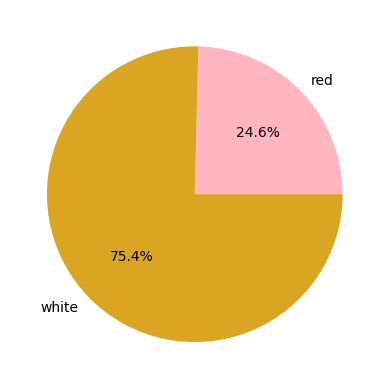

In [5]:
colors = {'red':'blue', 'white':'beige'}
wines.groupby('color').size().plot(kind='pie', autopct='%.1f%%', colors=['lightpink', 'goldenrod'])

## Line plot

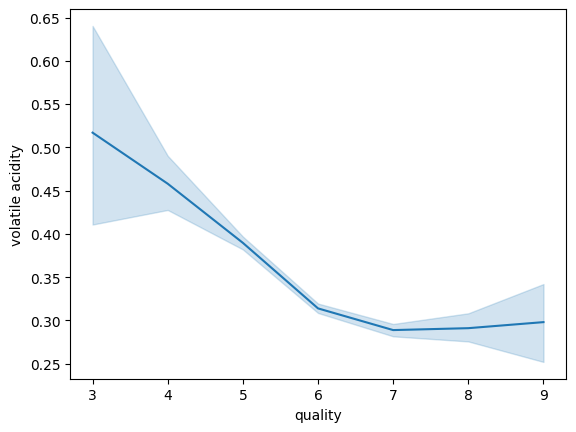

In [6]:
sns.lineplot(x='quality',y='volatile acidity' , data=wines)


# estimator by default based on mean, can be changed to: median, np.var (variance), np.std...
plt.style.use("dark_background")

## Distribution plot

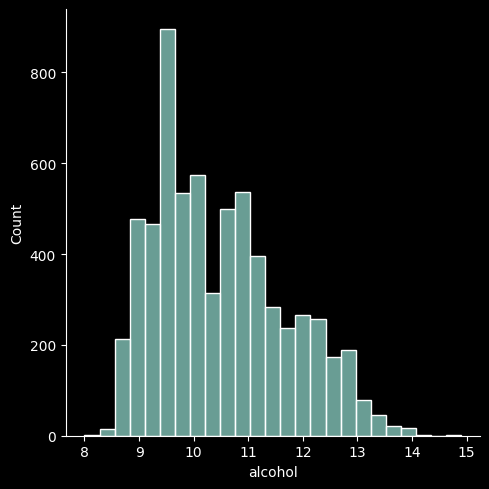

In [7]:
sns.displot(wines['alcohol'], bins=25)

## Joint plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


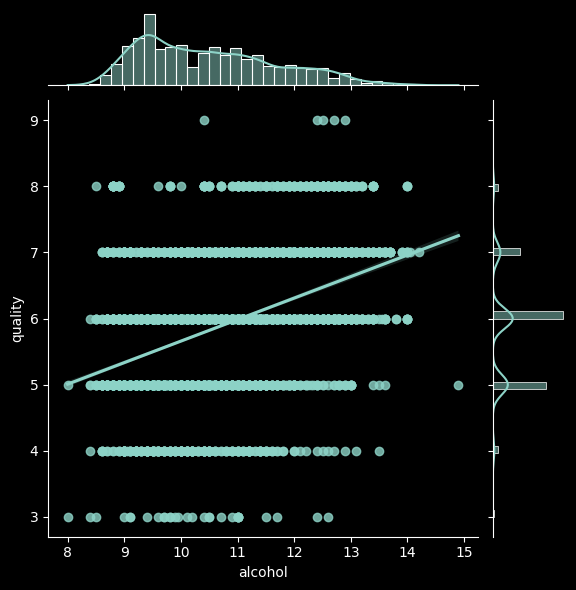

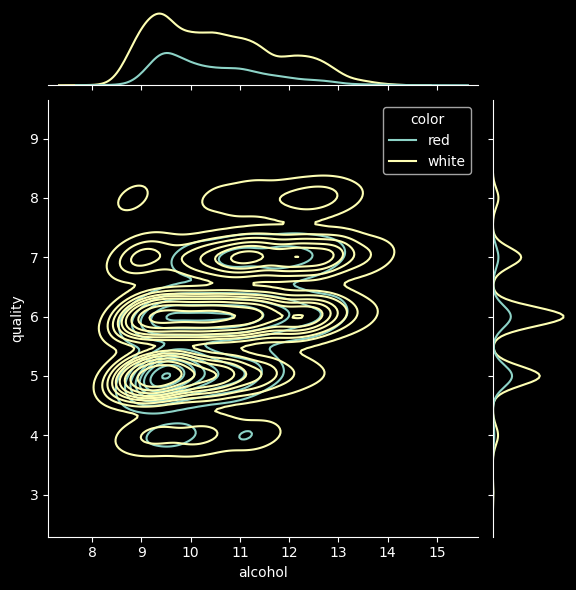

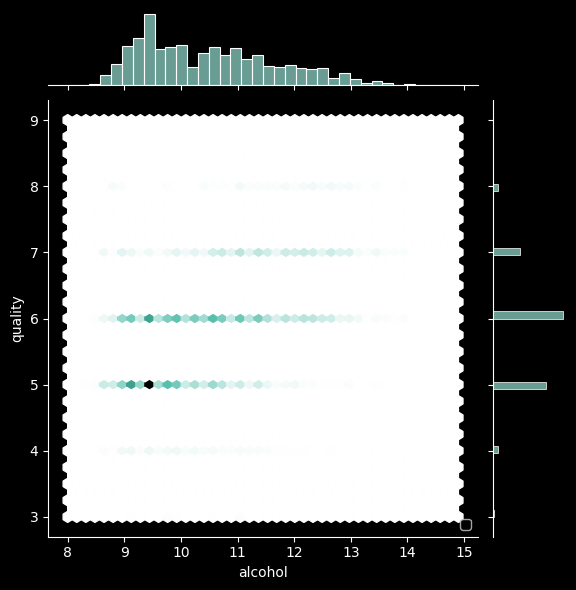

In [8]:
plt.rcParams['figure.figsize']=(10,10)
plt.style.use("dark_background")
sns.jointplot(data=wines, x='alcohol', y='quality', kind='reg')
sns.jointplot(data=wines, x='alcohol', y='quality', kind='kde', hue='color')
sns.jointplot(data=wines, x='alcohol', y='quality', kind='hex')


plt.legend(loc=4)


## Pair plot

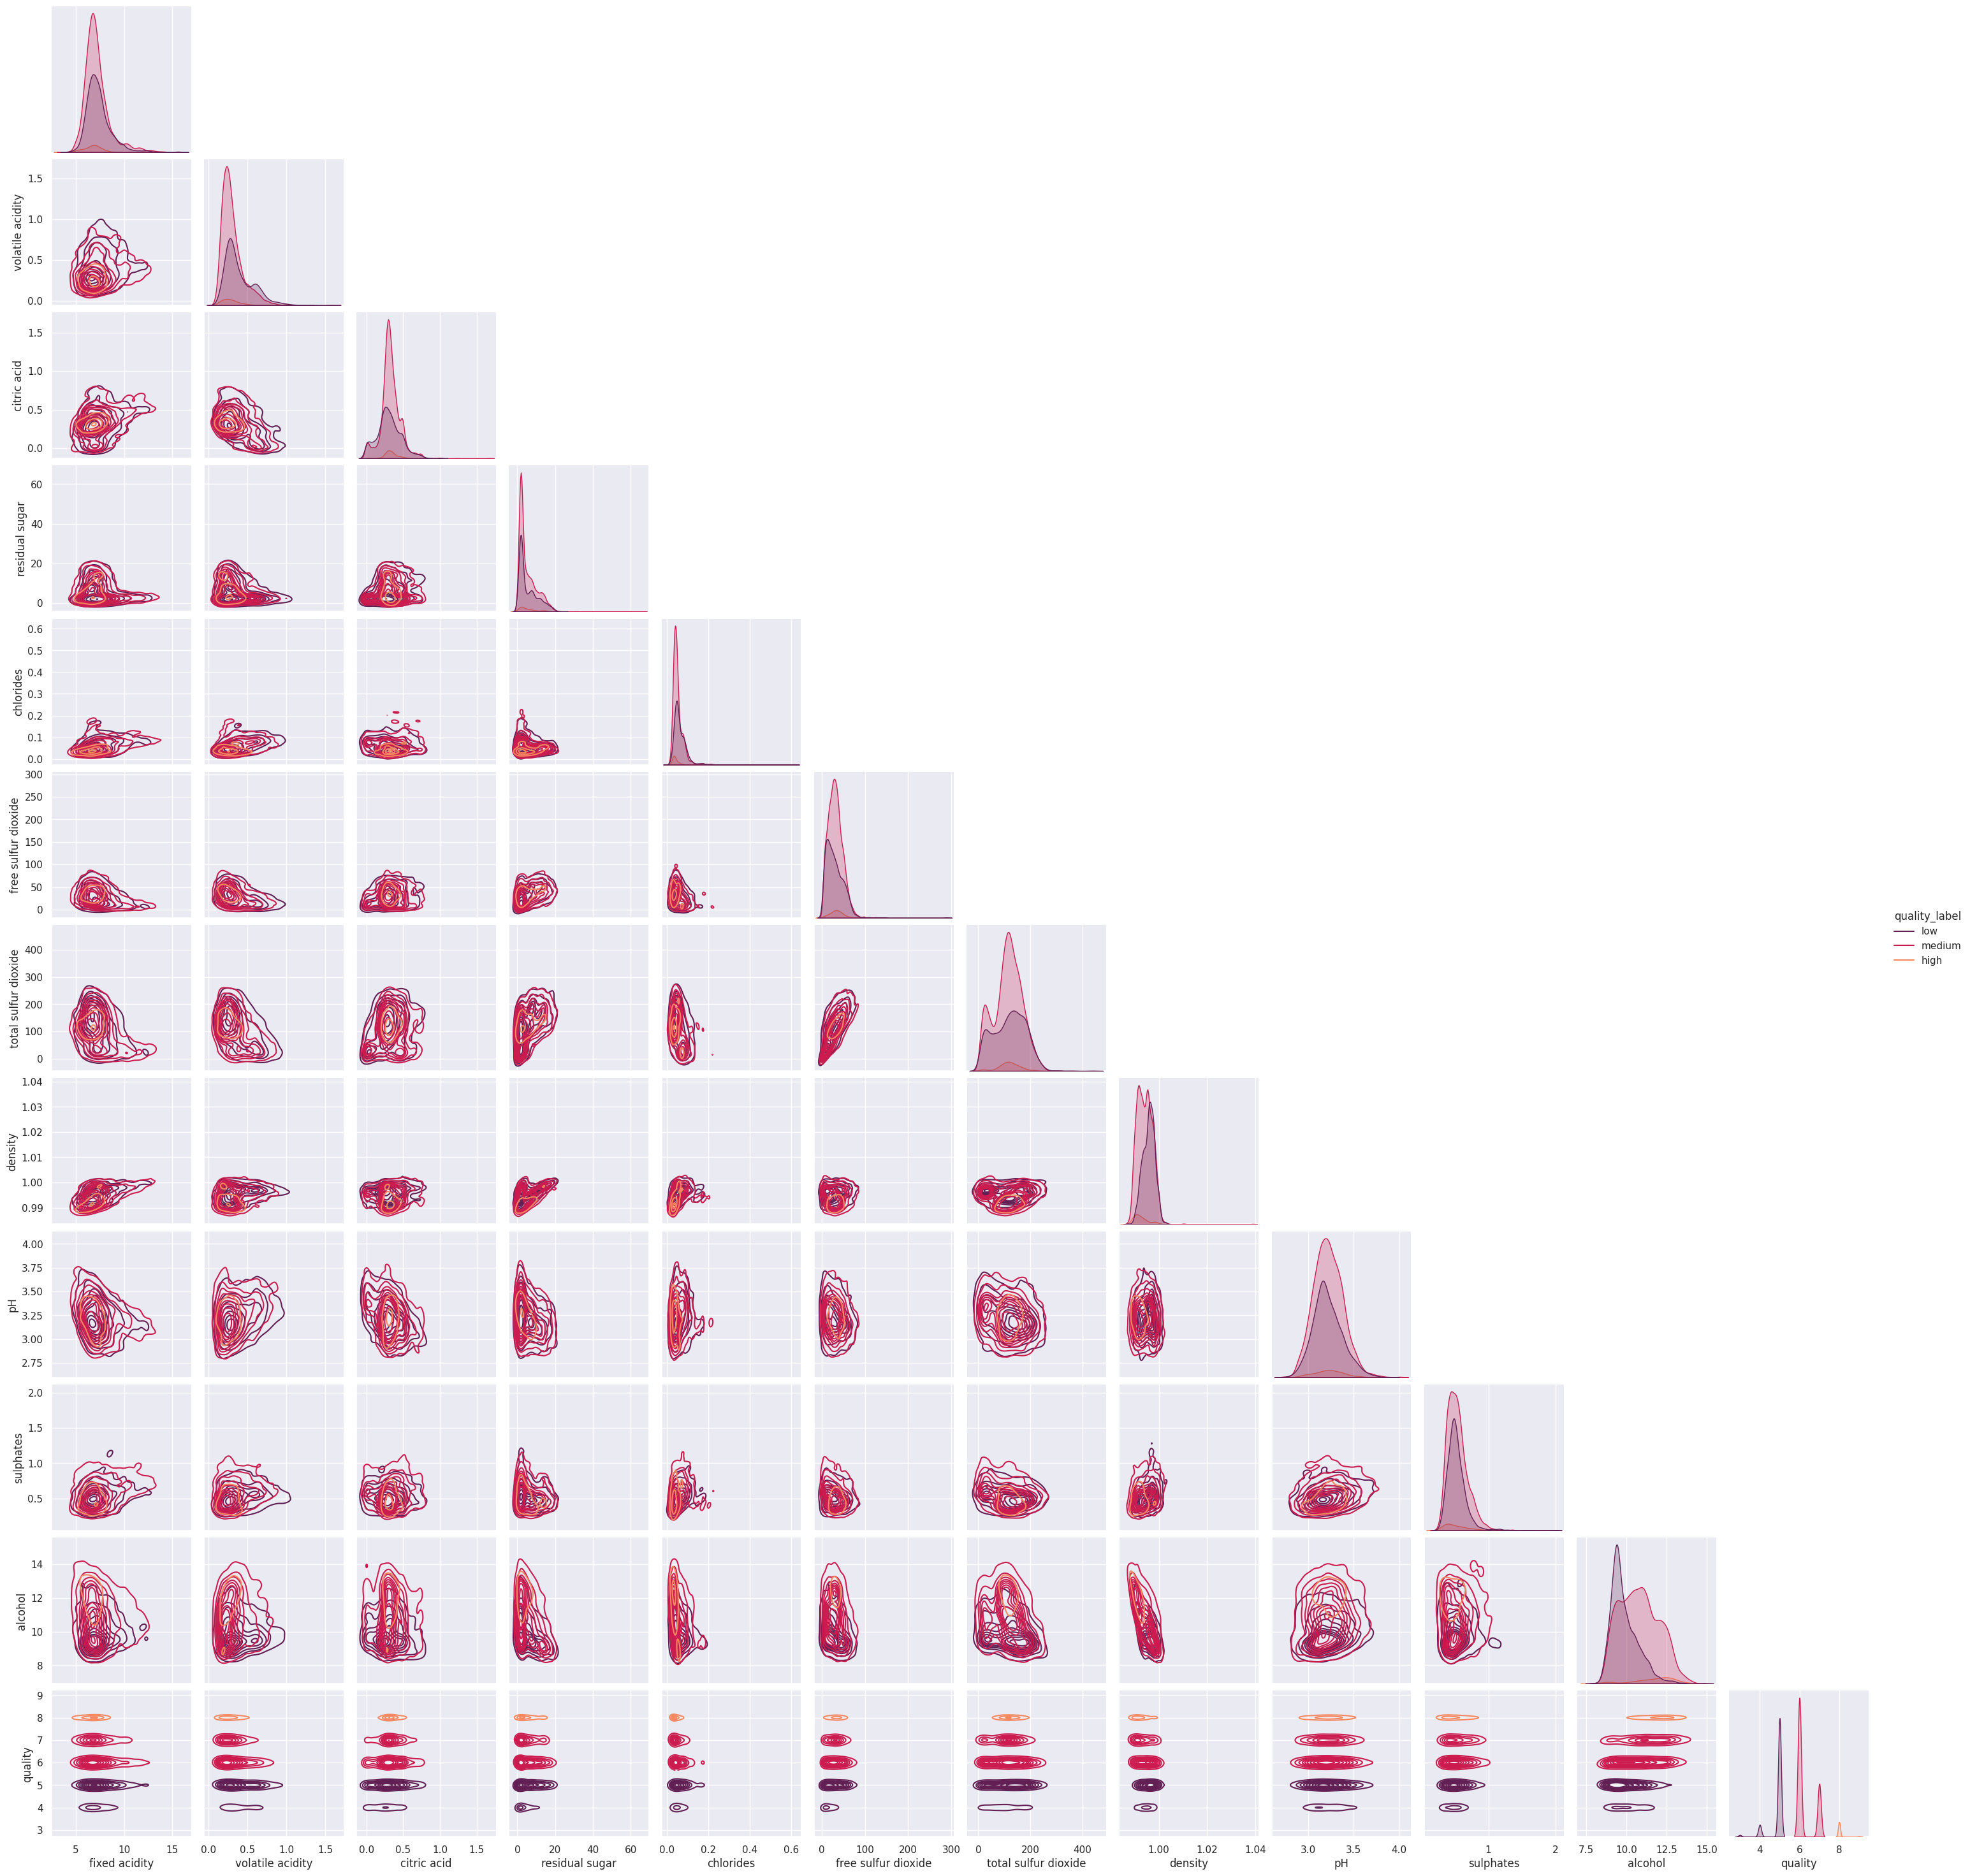

In [22]:
# sns.pairplot(wines, hue='quality_label', palette='rocket', corner=True, kind='kde')


## Rug plot

<Axes: xlabel='residual sugar'>

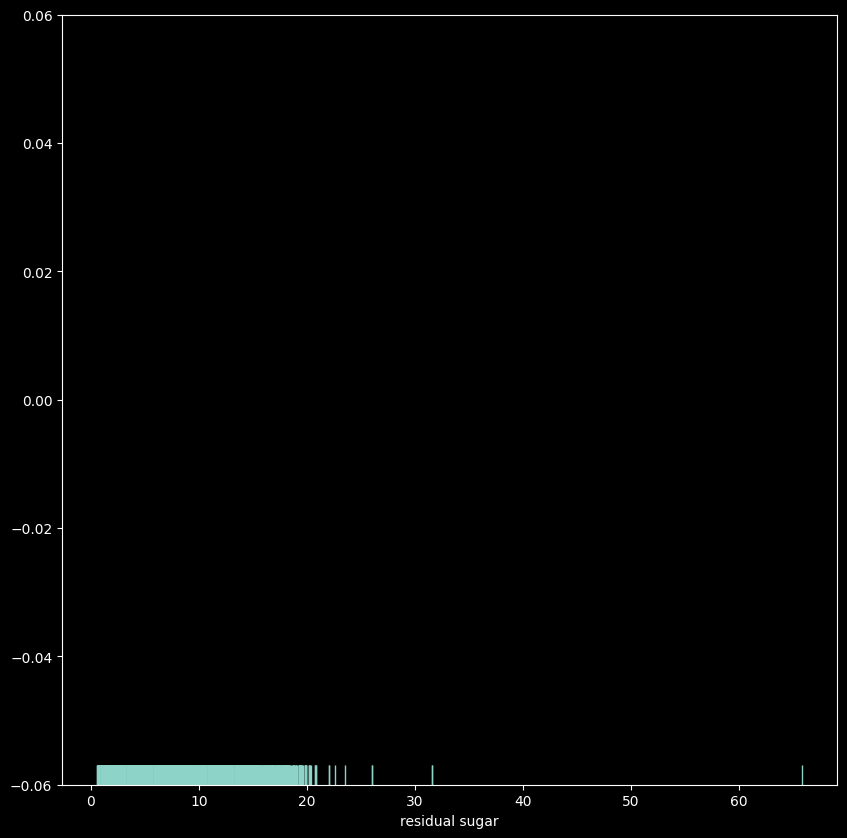

In [10]:
sns.rugplot(wines['residual sugar'])

## Styling

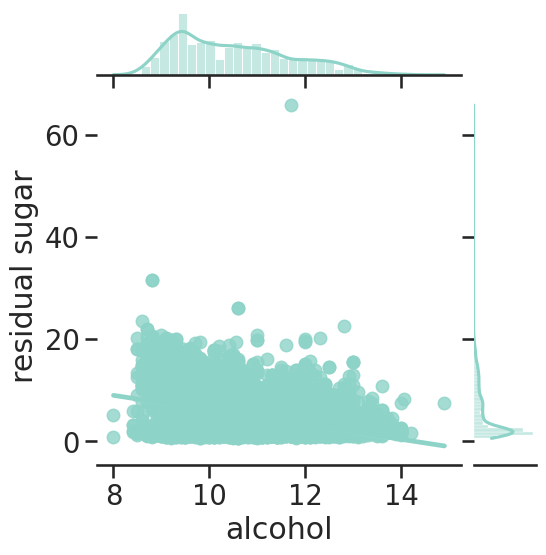

In [11]:
sns.set_style('ticks') #white, darkgrid, whitegrid : background style
plt.rcParams['figure.figsize']=(14,10)
sns.set_context('talk', font_scale=1.2) #paper, talk, poster : looks for different pourpuses
sns.jointplot(data=wines, x='alcohol', y='residual sugar', kind='reg')
sns.despine(left=True, bottom=False) # get rid of axis border




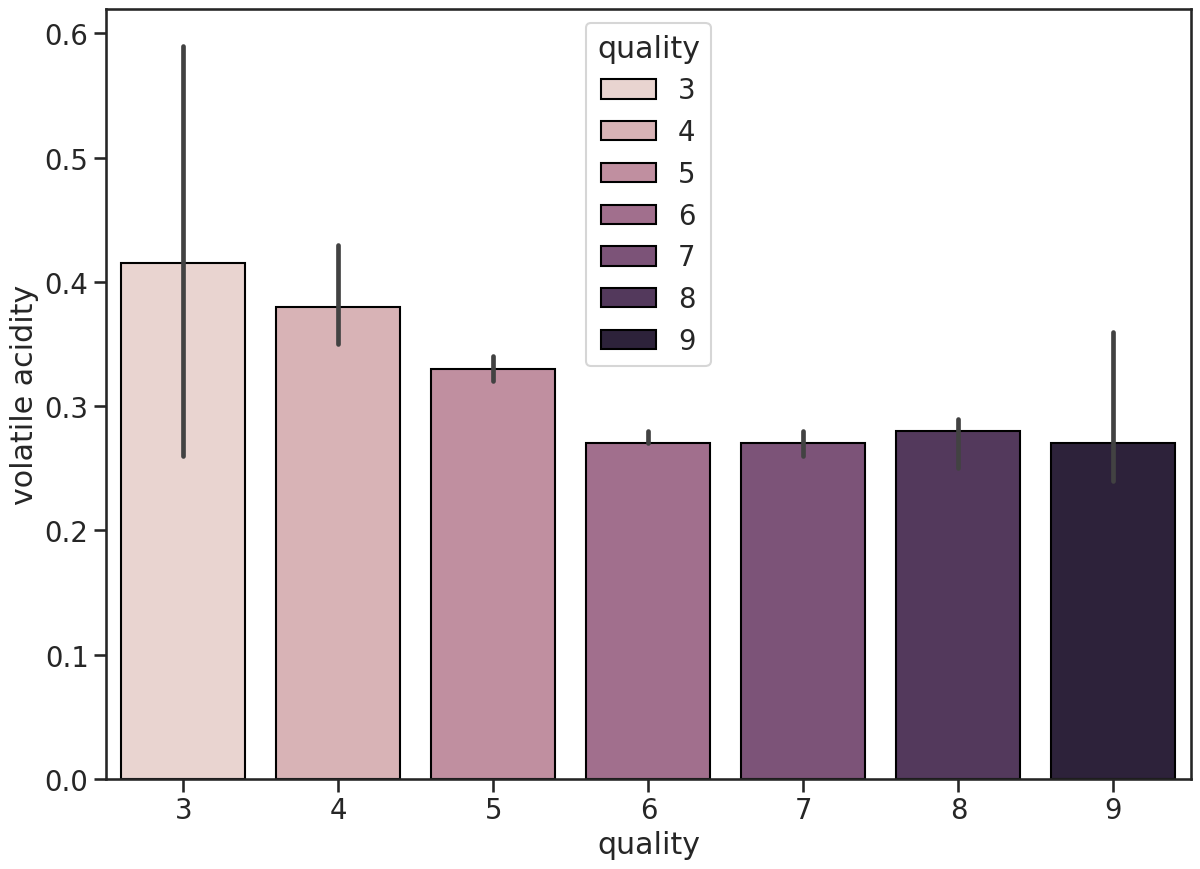

In [12]:
sns.barplot(x='quality',y='volatile acidity' , data=wines, estimator='median', edgecolor='black', hue='quality')
# estimator by default based on mean, can be changed to: median, np.var (variance), np.std...
plt.style.use("dark_background")

# Categorical plots

## Bar plots

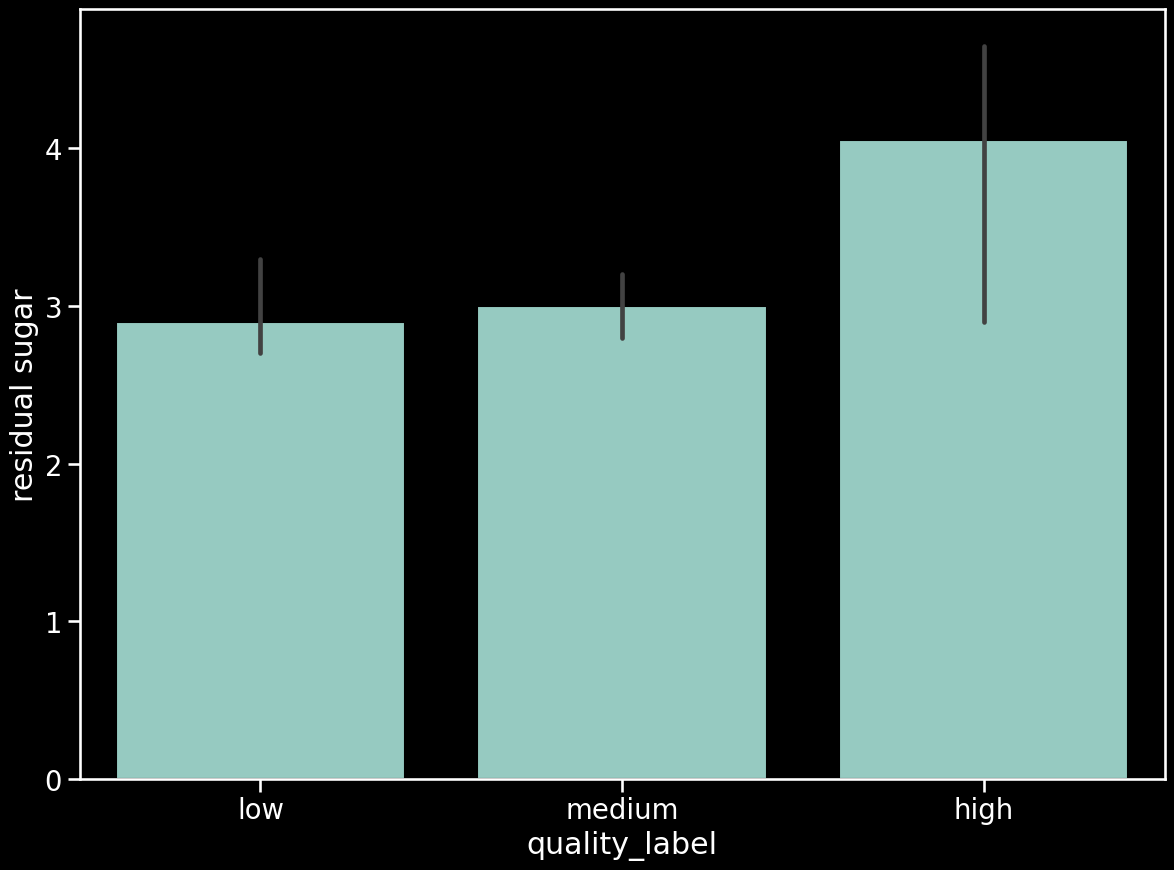

In [13]:
sns.barplot(x='quality_label',y='residual sugar' , data=wines, estimator='median', edgecolor='black',)
# estimator by default based on mean, can be changed to: median, np.var (variance), np.std...
plt.style.use("dark_background")

## Count plot

<Axes: xlabel='quality_label', ylabel='count'>

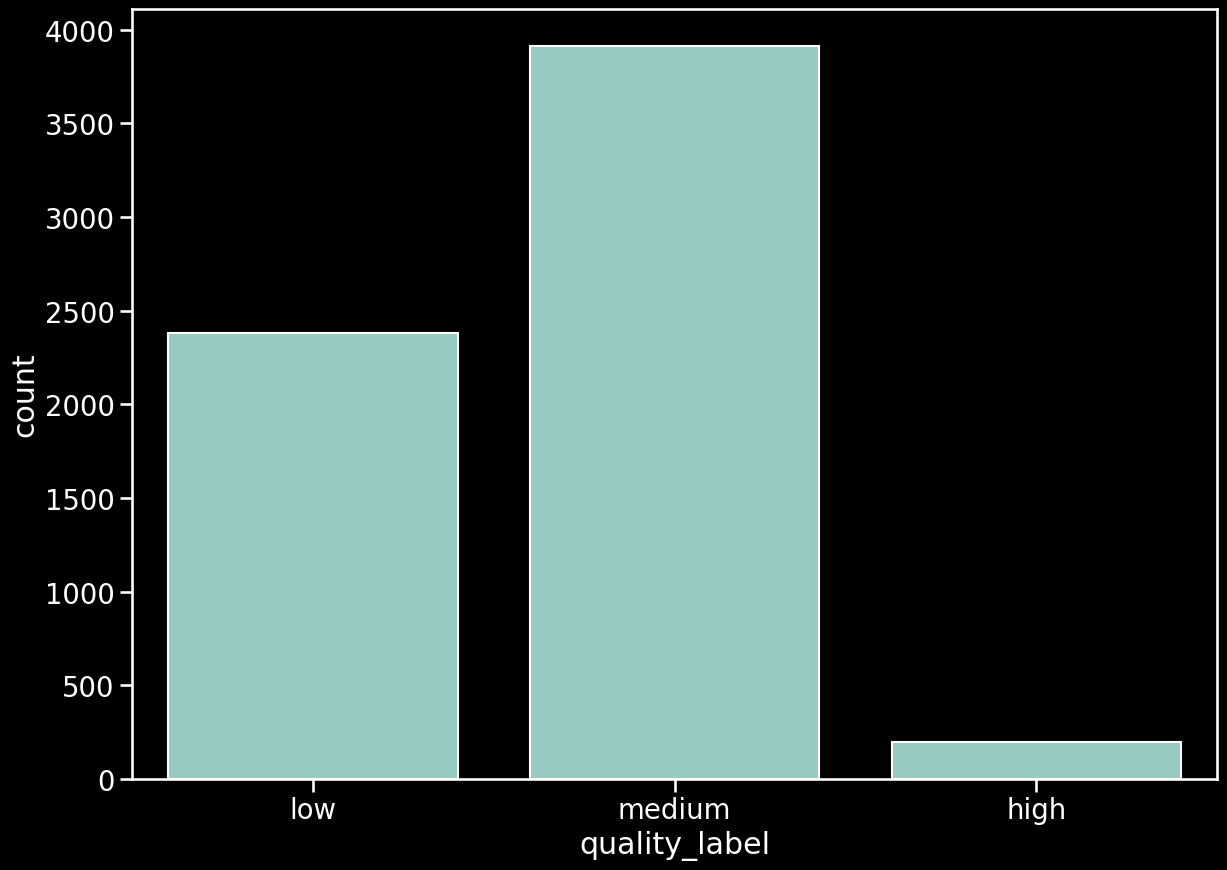

In [14]:
#looks same as barplot, but instead of mean shows the count of each categorical data
sns.countplot(x='quality_label', data=wines)

## Box plot


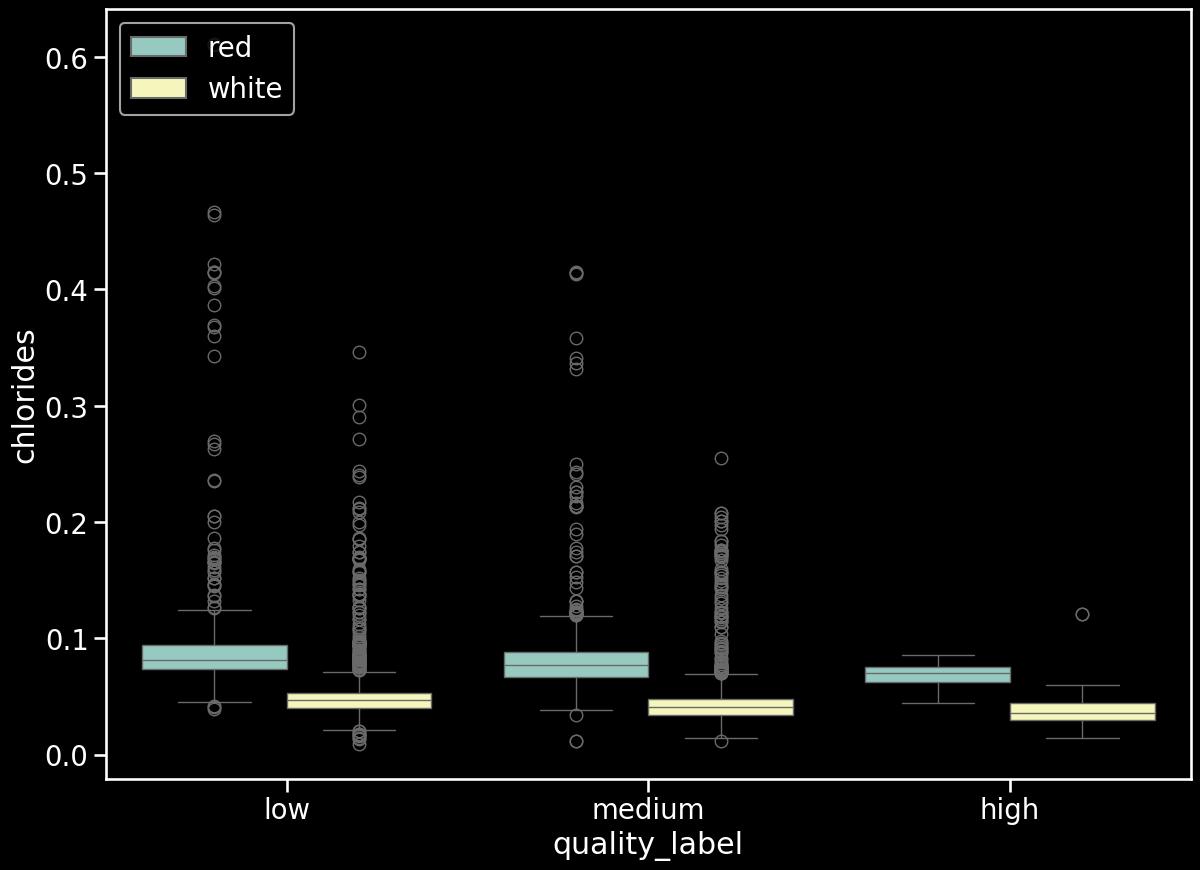

In [15]:
sns.boxplot(x='quality_label',y='chlorides' , data=wines, hue='color') #hue ideally is a categorical data

plt.rcParams['figure.figsize']=(10,10)
plt.legend(loc=2) #move legend box


## Violin plot

<Axes: xlabel='quality_label', ylabel='residual sugar'>

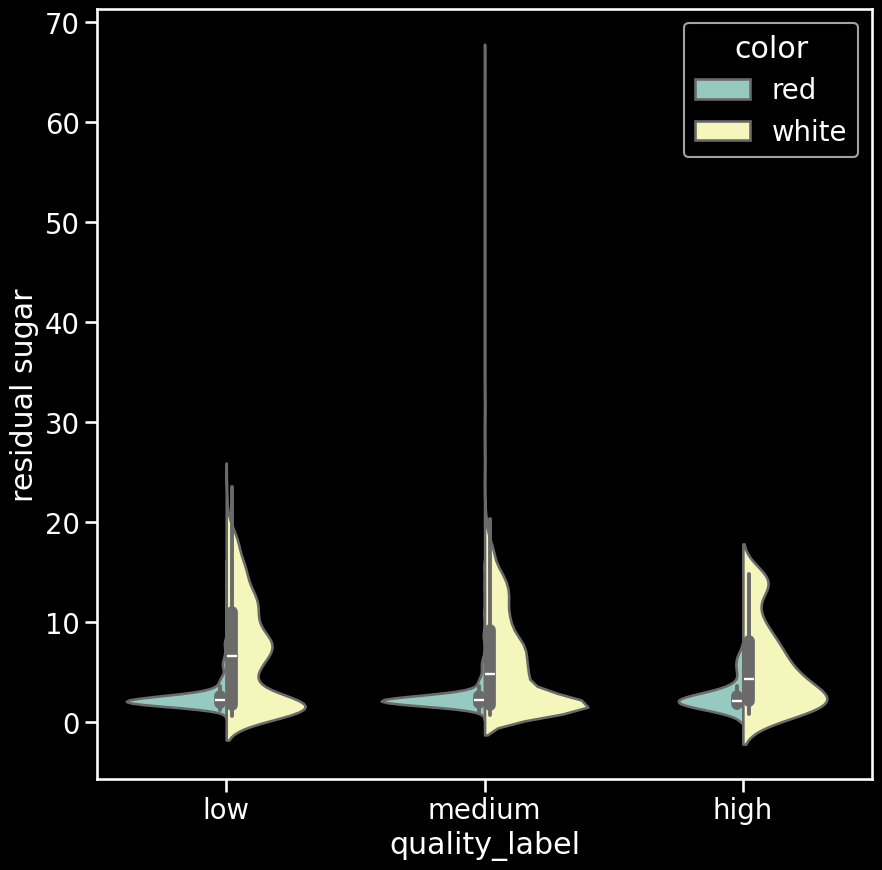

In [16]:
sns.violinplot(x='quality_label',y='residual sugar' , data=wines, hue='color', split=True) #hue ideally is another categorical data


## Strip plot

<Axes: xlabel='quality', ylabel='residual sugar'>

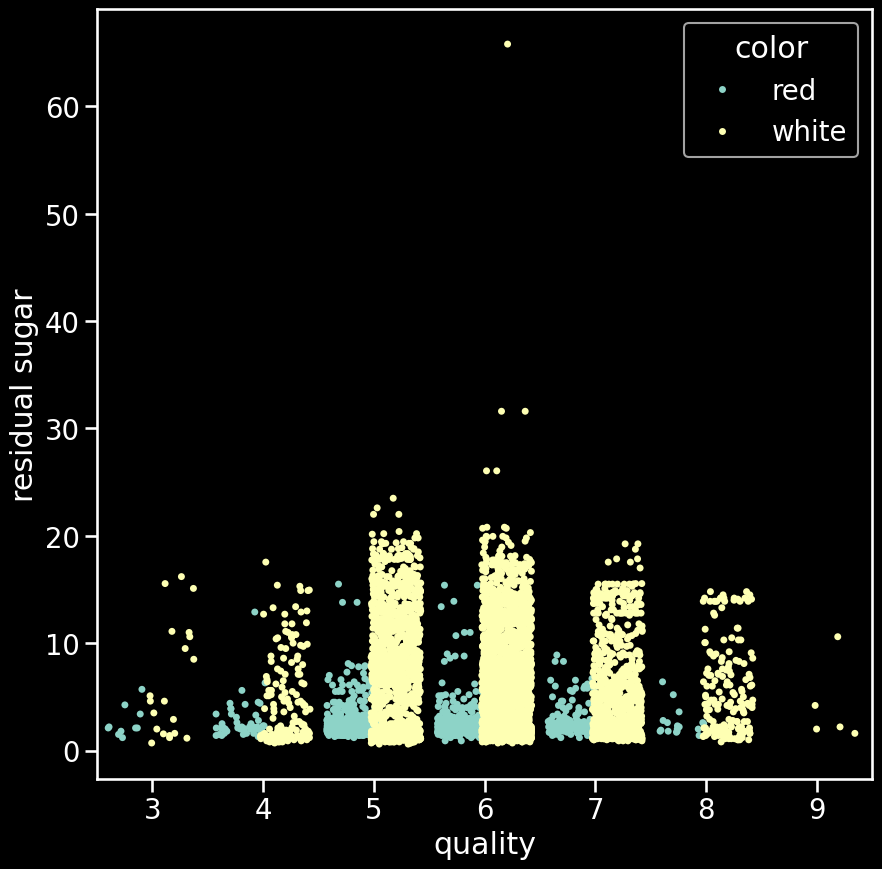

In [17]:
white_wine=white_wine_original.copy()
sns.stripplot(data=wines, x='quality', y='residual sugar', jitter=0.45,  hue='color', dodge=True) 
#jitter  spreads the dots sideways
#dodge separates by hue attribute


## Swarm plot

In [18]:

#DONT USE ON BIG DATA SET !!!!

#sns.violinplot(x='quality_label',y='residual sugar' , data=wines, hue='color') 
#sns.swarmplot(x='quality_label',y='color' , data=wines, color='white) 

#DONT USE ON BIG DATA SET !!!!


# Palettes

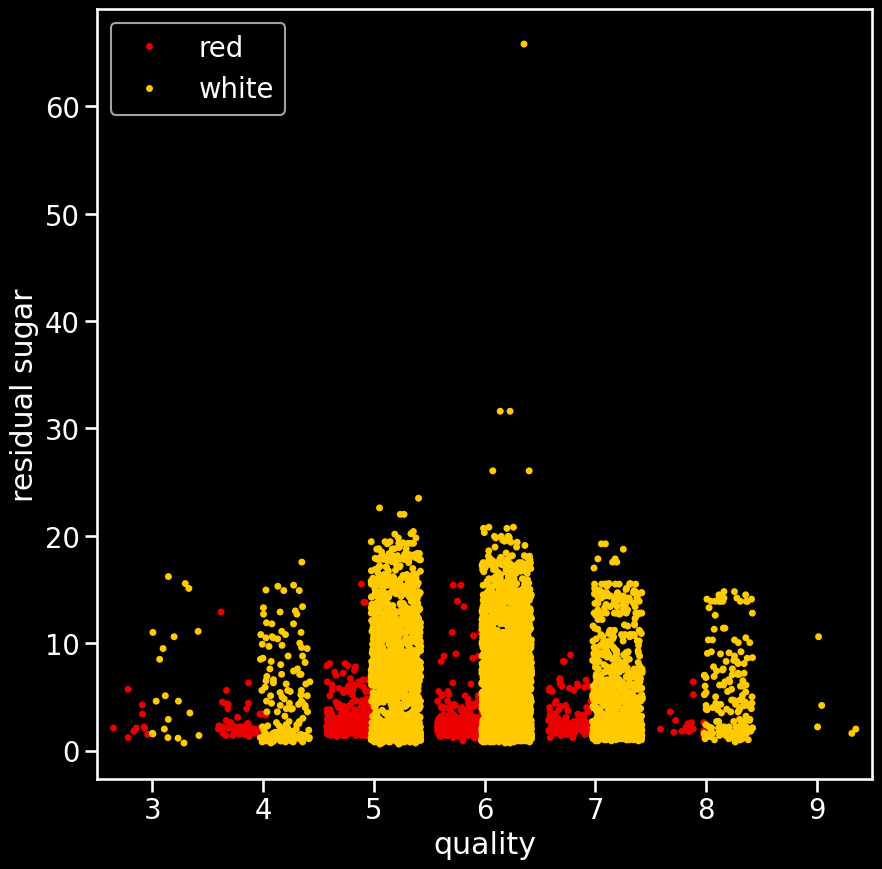

In [19]:
sns.stripplot(data=wines, x='quality', y='residual sugar', jitter=0.45,  hue='color', dodge=True, palette='hot') 
#for more palette names: https://matplotlib.org/stable/users/explain/colors/colormaps.html

plt.legend(loc=2)
# you can basically put legend anywhere, just google attributes for it

# Matrix plots

## Heatmaps

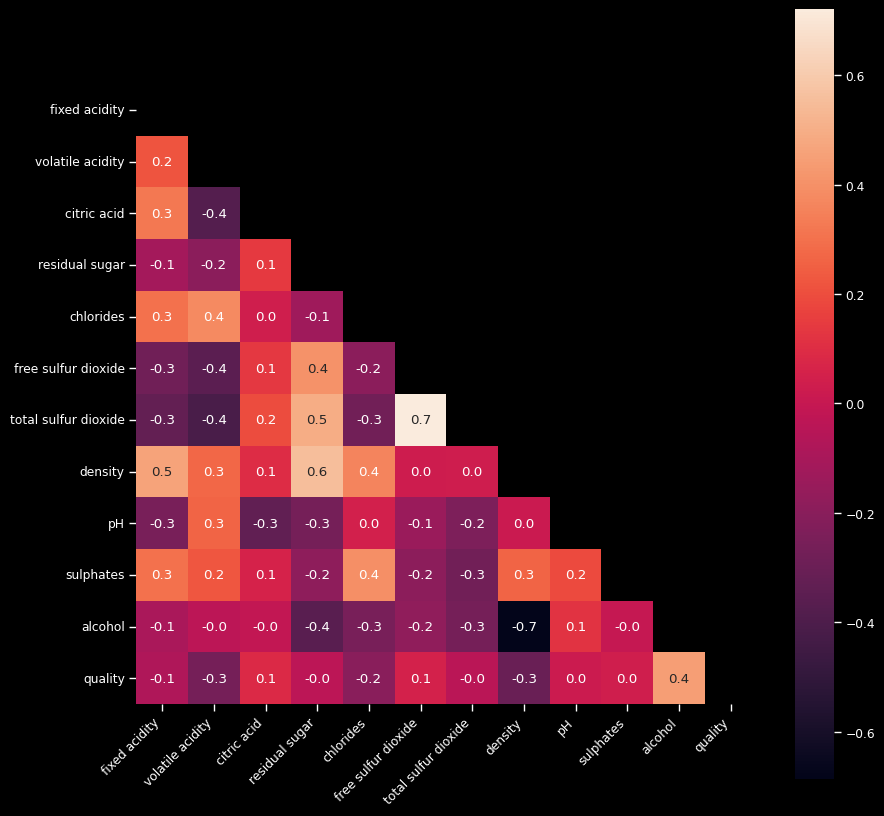

In [20]:

sns.set_context('paper', font_scale=1)


if 'quality_label' in wines:
    wine_mx=wines.drop(columns=['quality_label', 'color'])

wines_mx=wine_mx.corr()


# creating mask
mask = np.triu(np.ones_like(wines_mx))


ax=sns.heatmap(
    wines_mx,
    annot=True,fmt=".1f",
    square=True,
    mask=mask,
    cmap='rocket'
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc = {'figure.figsize':(15,10)})

<Axes: xlabel='color', ylabel='quality'>

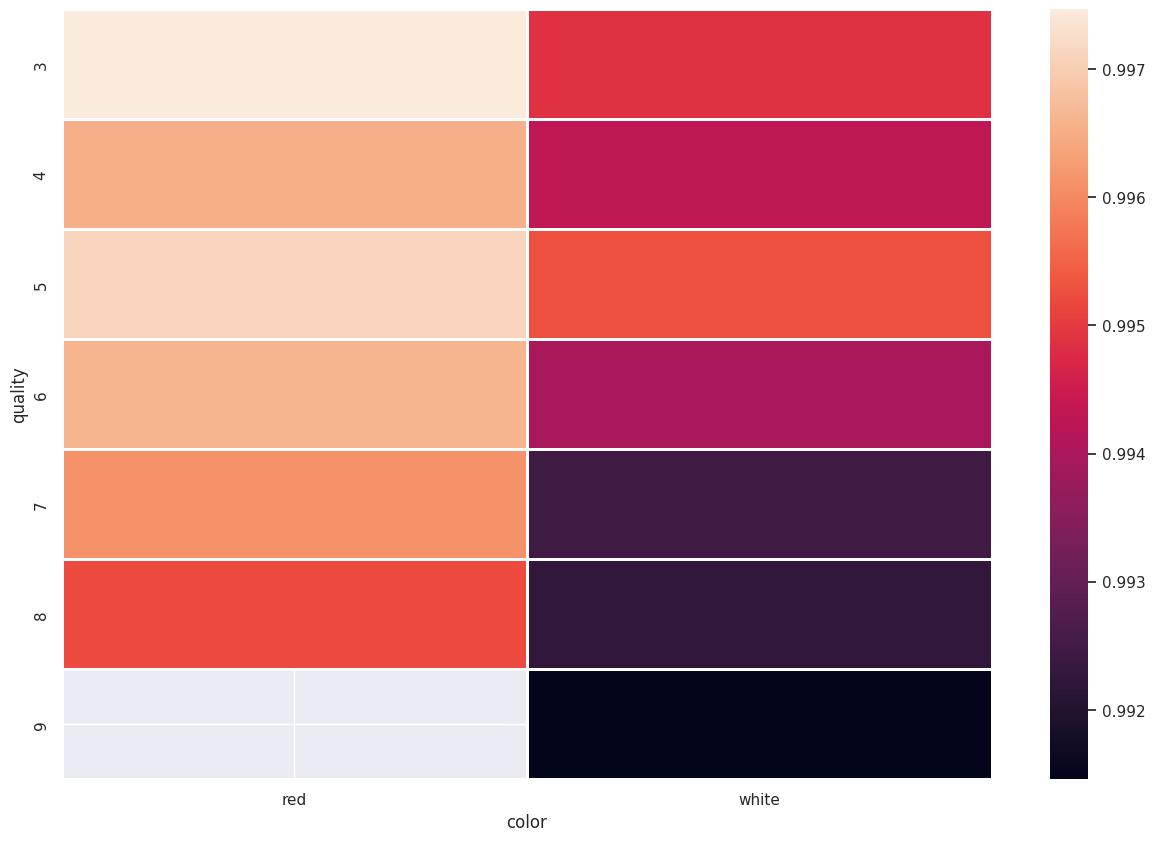

In [21]:
density=wines.pivot_table(index='quality', columns='color', values='density')
density
sns.heatmap(density, linecolor='white', linewidths=1)

## Cluster map

## Pair grid

## Facet grid